# Degree distribution of a friend

Continuing from the previous page, we will now consider the degree distribution of a friend of a node.

There are two ways to sample a friend of a node.
1. Sample a node uniformly at random and then sample a friend of the node.
2. Sample a *friendship* (i.e., edge) uniformly at random and then sample an end node of the edge.

Let us focus on the second case and leave the first case for interested students as an exercise.
In the second case, we sample an edge from the network.
This sampling is biased towards nodes with many edges, i.e., a person with $d$ edges is $d$ times more likely to be sampled than someone with 1 edge.
Thus, the degree distribution $p'(d)$ of a friend is given by

$$
p' (d) = C \cdot d \cdot p(d)
$$
The additional term $d$ reflects the fact that a person with $d$ friends is $d$ times more likely to be sampled than someone with 1 friend.
Term $C$ is the normalization constant that ensures the sum of probabilities $p'(d)$ over all $d$ is 1, which can be easily computed as follows:

$$
C = \frac{1}{\sum_{d} d \cdot p(d)} = \frac{1}{\langle d \rangle}
$$

where $\langle d \rangle$ is the average degree of the network. Substituting $C$ into $p'(d)$, we get:

$$
p' (d) = \frac{d}{\langle d \rangle} p(d)
$$

This is the degree distribution of a friend, and it is easy to verify that $p'(d) > p(d)$ for $k \geq \langle d \rangle$, i.e., a friend has a higher chance of having a higher degree than a node. In other words, the friendship paradox 😉.

:::{note}
The distribution $p'(d)$ is related to *the excess degree distribution* given by

$$
q(d) = \frac{d + 1}{\langle d \rangle} p(d+1)
$$

The term *excess* comes from the fact that the distribution represents the number of additional connections a randomly chosen friend has, beyond the connection that led to their selection. It excludes the link to the focal node and focuses on the remaining connections of the selected friend.
:::

## Demonstration

Let us compare the degree distribution of a node and its friend. As before, we will create a Barabási-Albert network with $N=10,000$ nodes and $m=1$ edge per node.

In [1]:
import igraph
g = igraph.Graph.Barabasi(n = 10000, m = 1) # Create a Barabási-Albert network
A = g.get_adjacency() # Get the adjacency matrix

Compute the degree of each node and the degree distribution of a friend.

In [2]:
import numpy as np
deg = np.sum(A, axis=1)
deg = deg.flatten()
p_deg = np.bincount(deg) / len(deg)

Now, let us compute the degree distribution of a friend.
We first get the edges in the network, from which we sample a friend.

In [3]:
from scipy import sparse
src, trg, _ = sparse.find(A)

- `sparse.find(A)` returns the source node, target node, and edge weight of the edge.
- `src` is the source node of the edge
- `trg` is the target node of the edge
- `_` is used to ignore the edge weight values, as we only need the source and target nodes for this analysis.

Now, let us get the degree of each friend

In [4]:
deg_friend = deg[src]
p_deg_friend = np.bincount(deg_friend) / len(deg_friend)

The CCDF of the degree distributions of a node and a friend can be computed by:

In [5]:
ccdf_deg = 1 - np.cumsum(p_deg)[:-1]
ccdf_deg_friend = 1 - np.cumsum(p_deg_friend)[:-1]

and plotted by:

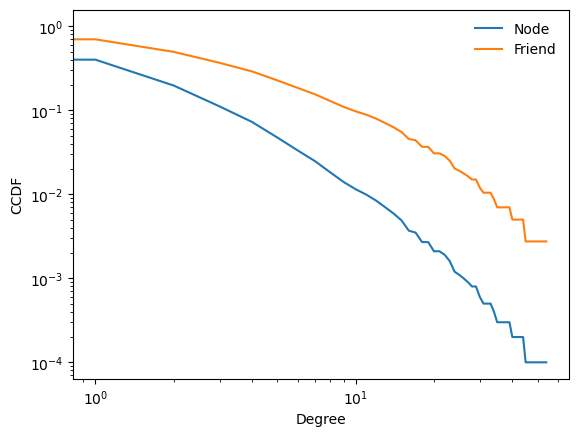

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.lineplot(x=np.arange(len(ccdf_deg)), y=ccdf_deg, label='Node')
ax = sns.lineplot(x=np.arange(len(ccdf_deg)), y=ccdf_deg_friend, label='Friend', ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('CCDF')
ax.legend(frameon = False)

The slope of the CCDF of a friend is flatter than that of a node, indicating that the degree distribution of a friend is biased towards higher degrees.